### Question 2
 Consider only the below columns and prepare a prediction model for predicting Price.
    Corolla<-       Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car

Price  -- Offer Price in EUROs	

Age_08_04 -- Age in months as in August 2004	

Mfg_Month -- Manufacturing month (1-12)	

Mfg_Year	-- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color	 -- Metallic Color?  (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic	-- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders	-- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

Guarantee_Period -- 	Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

Airco -- Airconditioning  (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

Boardcomputer -- Boardcomputer  (Yes=1, No=0)

CD_Player -- CD Player  (Yes=1, No=0)

Central_Lock -- Central Lock  (Yes=1, No=0)

Powered_Windows -- Powered Windows  (Yes=1, No=0)

Power_Steering -- Power Steering  (Yes=1, No=0)

Radio -- Radio  (Yes=1, No=0)

Mistlamps	-- Mistlamps  (Yes=1, No=0)

Sport_Model -- Sport Model  (Yes=1, No=0)

Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

Metallic_Rim --Metallic Rim  (Yes=1, No=0)

Radio_cassette -- Radio Cassette  (Yes=1, No=0)

Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [1]:
# Importing the required libraries
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Files
toyota=pd.read_csv('ToyotaCorolla.csv',encoding='CP1252')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
# Getting columns 
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
# Getting the required columns out of all the columns
corolla=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Performing EDA on the data

In [5]:
#Getting info about the data
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
#Describe the data
corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
# To check the null values of the data
corolla.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
print("Dimensions",corolla.shape)
print("Name of the Comlumns",corolla.columns)

Dimensions (1436, 9)
Name of the Comlumns Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')


### Checking Co-relation between variables (Columns)

In [9]:
# Finding corelation between two variables
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


### Scatterplots between variables along with histogram

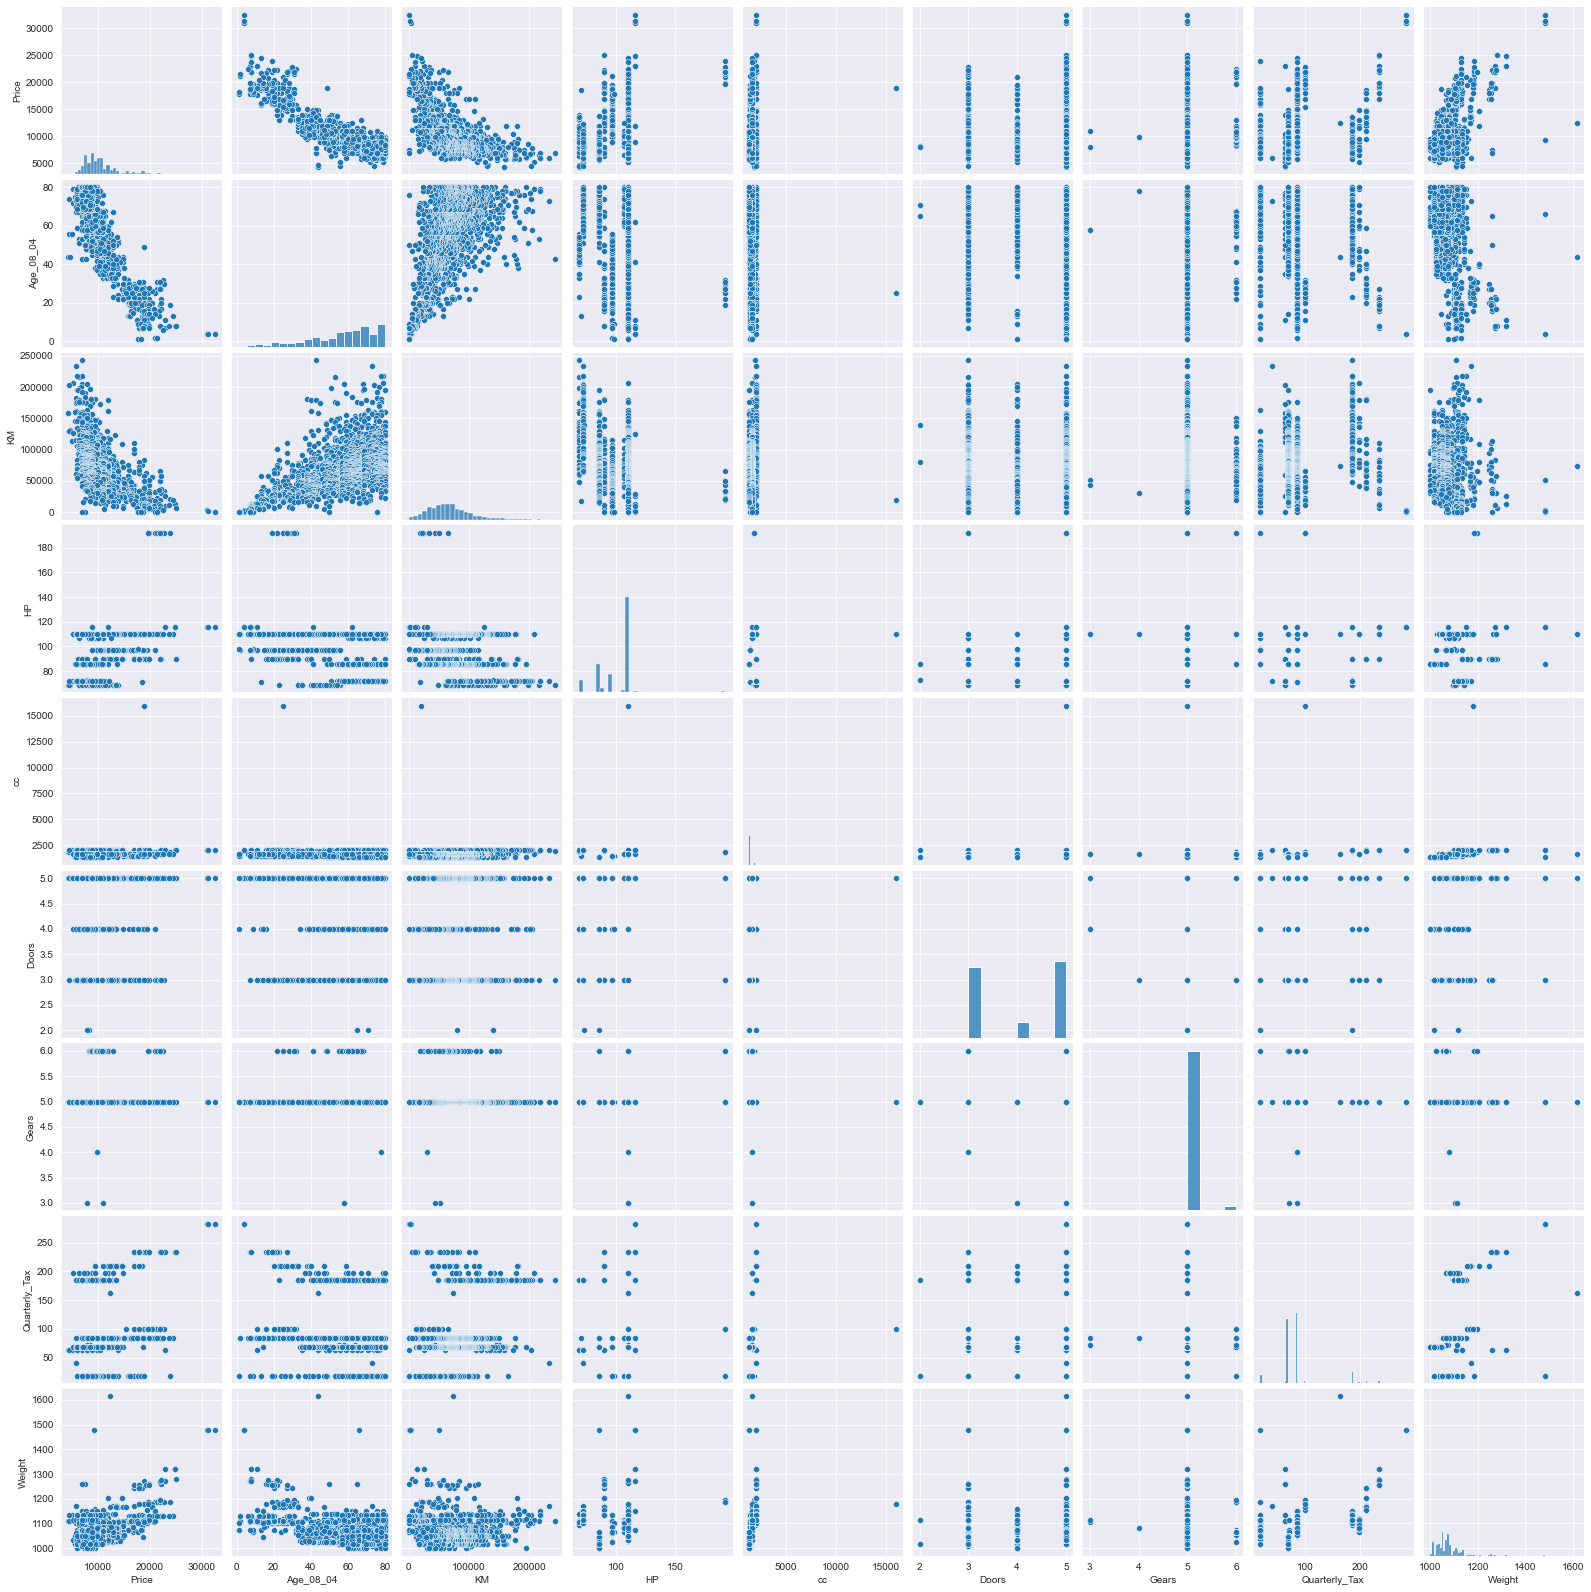

In [10]:
# Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(corolla)

### Fitting the model

The equation would be,

Price = B0+ B1(Age_08_04) + B2(KM) + B3(HP) + B4(cc) + B5(Doors) + B6(Gears) + B7(Quarterly_Tax) + B8(Weight) + e



In [11]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        22:31:57   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simple Linear Regression Models

In [12]:
# Model fitting for the cc independent variable
cc_model=smf.ols('Price~cc',data=corolla).fit()
# The equation would be,Price = B0+ B1(cc)
print(cc_model.pvalues)

if cc_model.pvalues['cc'] < 0.05:
    print("\n cc is Significant variable")
else:
    print("\n cc is Insignificant variable")

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

 cc is Significant variable


In [13]:
# Model fitting for the Doors independent variable
Doors_model=smf.ols('Price~Doors',data=corolla).fit()
# The equation would be, Price = B0 + B1(Doors)
print(Doors_model.pvalues)

if Doors_model.pvalues['Doors'] < 0.05:
    print("\n Doors is Significant variable")
else:
    print("\n Doors is Insignificant variable")

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

 Doors is Significant variable


In [14]:
# Model fitting for the cc and Doors 
CD_m=smf.ols('Price~cc+Doors',data=corolla).fit()
# The equation would be, Price = B0 + B1(cc) + B2(Doors)
print(CD_m.pvalues)

if all(CD_m.pvalues[['cc','Doors']] < 0.05):
    print("\n Both are Significant")
elif any(CD_m.pvalues[['cc','Doors']] < 0.05):
    if CD_m.pvalues['cc'] < 0.05:
        print('\n cc is a significant variable and Doors is an insignificant variable.')
    else:
        print('\n Doors is a significant variable and cc is an insignificant variable.')

Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64

 Both are Significant


### Calculating VIF (Variance Inflation Factor)

In [15]:
rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared
print('\n The VIF value of the cc is',1/(1-rsq_cc))
rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared
print('\n The VIF value of the Doors is',1/(1-rsq_Doors))


 The VIF value of the cc is 1.16389398494238

 The VIF value of the Doors is 1.1565752070760436


##### Model fitting without Doors column(independent variable)
The equation would be,

Price = B0+ B1(Age_08_04) + B2(KM) + B3(HP) + B4(cc) + B5(Gears) + B6(Quarterly_Tax) + B7(Weight) + e

In [16]:
cc_m=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=corolla).fit()
cc_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        22:31:57   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model fitting without cc column(independent variable)
The equation would be,

Price = B0+ B1(Age_08_04) + B2(KM) + B3(HP) + B4(Doors) + B5(Gears) + B6(Quarterly_Tax) + B7(Weight) + e

In [17]:
Doors_m=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit()
Doors_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1291.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        22:31:57   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5477.5069   1409.995     -3.885      0.000   -8243.391   -2711.623
Age_08_04      -121.7000      2.616    -46.518      0.000    -126.832    -116.568
KM               -0.0209      0.001    -16.756      0.000      -0.023      -0.018
HP               31.3306      2.807     11.161      0.000      25.824      36.837
Doors            -0.7545     40.012     -0.019      0.985     -79.243      77.734
Gears           598.2602    197.089      3.035      0.002     211.645     984.875
Quarterly_Tax     3.7352      1.301      2.872      0.004       1.184       6.287
Weight           16.7301      1.055     15.864      0.000      14.661      18.799
==============================================================================
Omnibus:                      148.064   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.063
Skew:                          -0.208   Prob(JB):                    6.13e-211
Kurtosis:                       7.001   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model fitting without cc column and Doors column(independent variables) 
The equation would be,

Price = B0+ B1(Age_08_04) + B2(KM) + B3(HP) + B4(Gears) + B5(Quarterly_Tax) + B6(Weight) + e

In [18]:
_m=smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=corolla).fit()
_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        22:31:57   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
Age_08_04      -121.6999      2.615    -46.534      0.000    -126.830    -116.570
KM               -0.0209      0.001    -16.769      0.000      -0.023      -0.018
HP               31.3269      2.799     11.191      0.000      25.836      36.818
Gears           598.9653    193.441      3.096      0.002     219.507     978.424
Quarterly_Tax     3.7371      1.296      2.883      0.004       1.194       6.280
Weight           16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Hence, The best equation is,
##### *Price = B0+ B1(Age_08_04) + B2(KM) + B3(HP) + B4(Gears) + B5(Quarterly_Tax) + B6(Weight) + e*
Because, In all the different models, the R-squared values, Audjusted R-squared values and AIC values are same.

BIC value is lesser in "*Price = B0+ B1(Age_08_04) + B2(KM) + B3(HP) + B4(Gears) + B5(Quarterly_Tax) + B6(Weight) + e*" in this equation as compared to all the different equations. So,based on the BIC value we can say that, the above mentioned equation is the best model.

### Residual Analysis

### Test for Normality of Residuals (Q-Q plot)

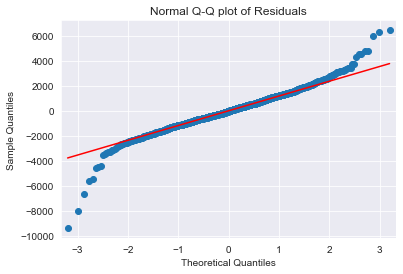

In [19]:
# QQ Plot for the Residuals
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

### Residual Plot for Homoscedasticity

In [20]:
# Creating Function to get Standardized values of Residuals and fitted Values
def get_standardized_values ( vals):
    return(vals - vals.mean())/vals.std()

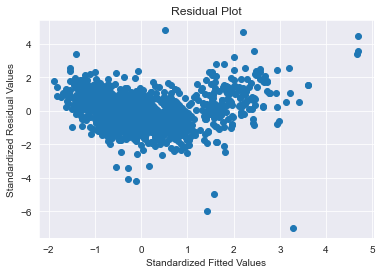

In [21]:
# Plotting the standardized values of residulas and fitted values. 
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

### Regressor Plot
 Residuals Vs Regressors Plot

eval_env: 1


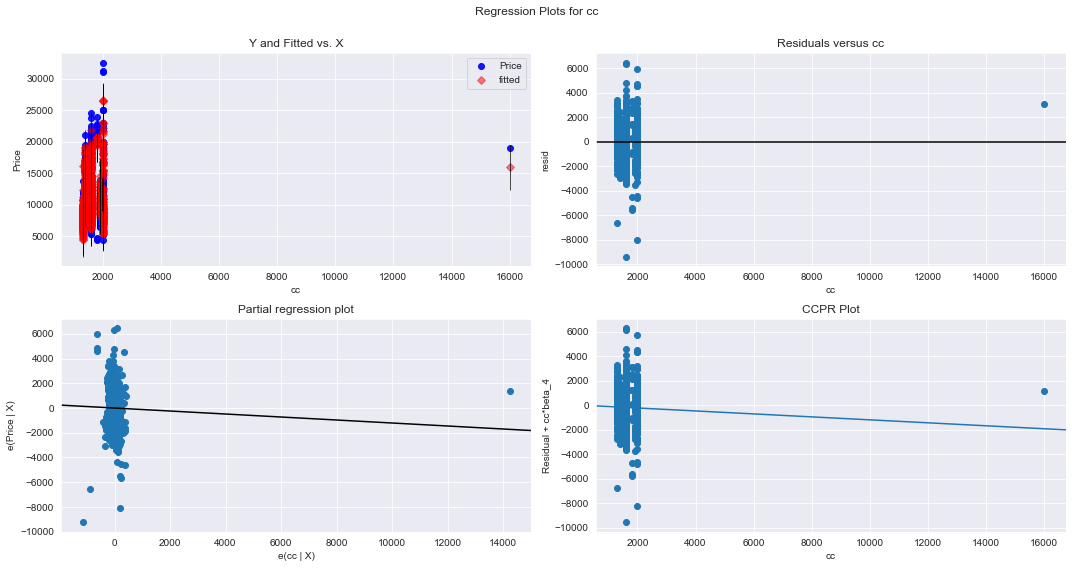

In [22]:
# Taking cc as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'cc', fig = fig)
plt.show()

eval_env: 1


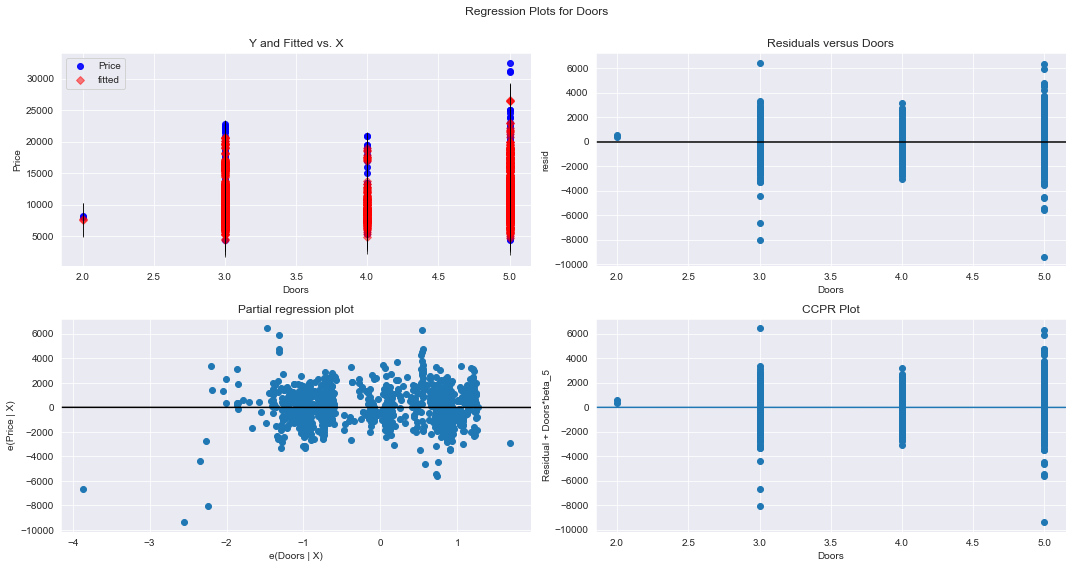

In [23]:
# Taking Doors as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig = fig)
plt.show()

eval_env: 1


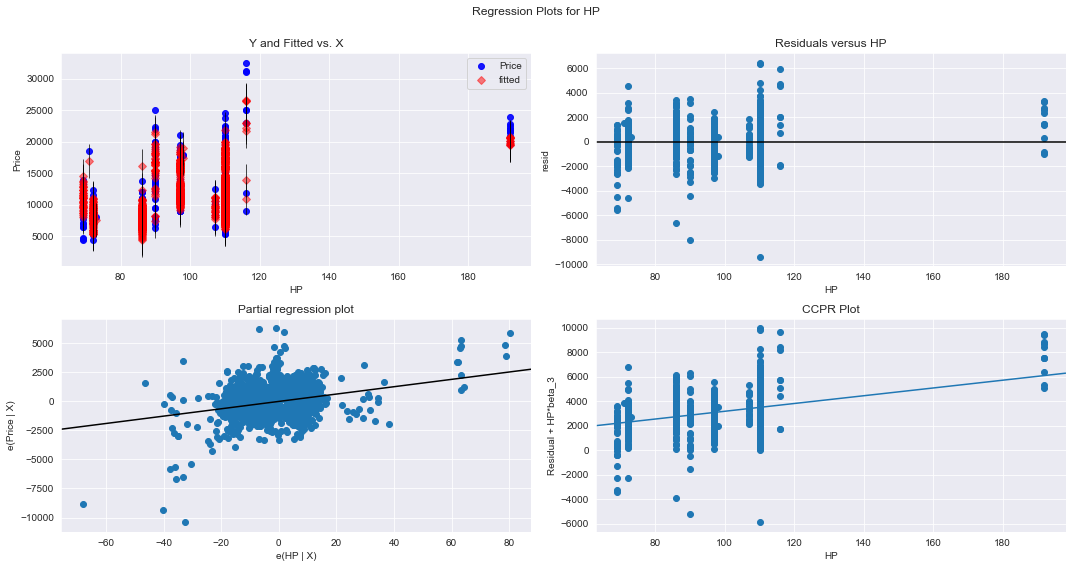

In [24]:
# Taking HP as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig = fig)
plt.show()

eval_env: 1


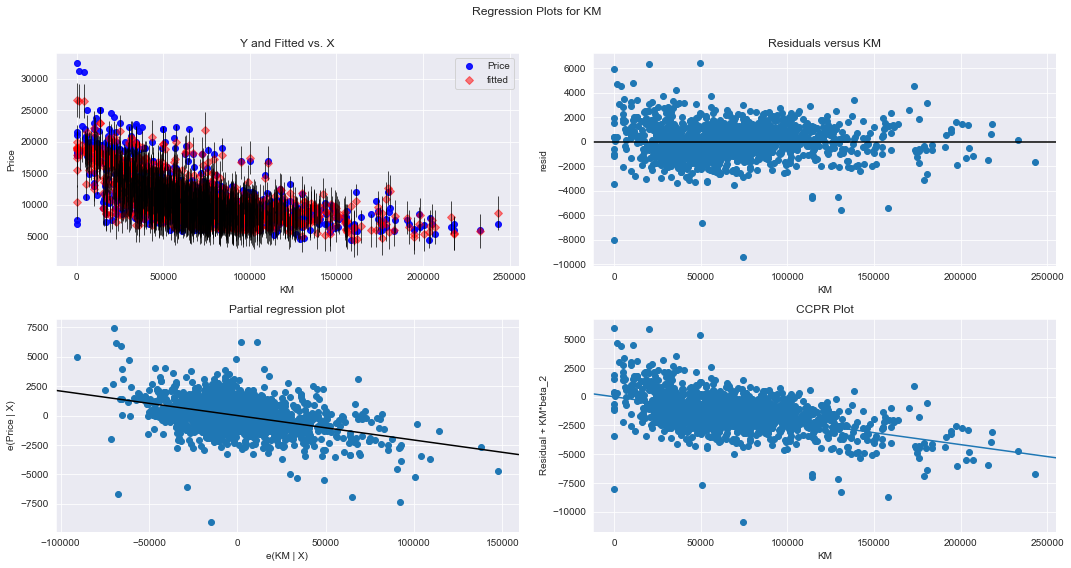

In [25]:
# Taking KM as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig = fig)
plt.show()

eval_env: 1


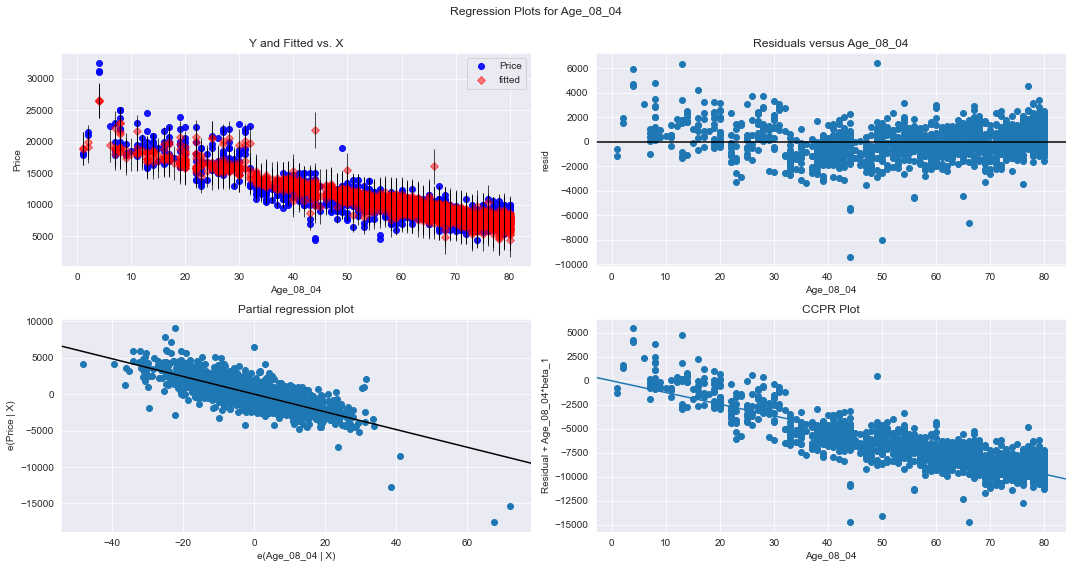

In [26]:
# Taking Age_08_04 as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Age_08_04', fig = fig)
plt.show()

eval_env: 1


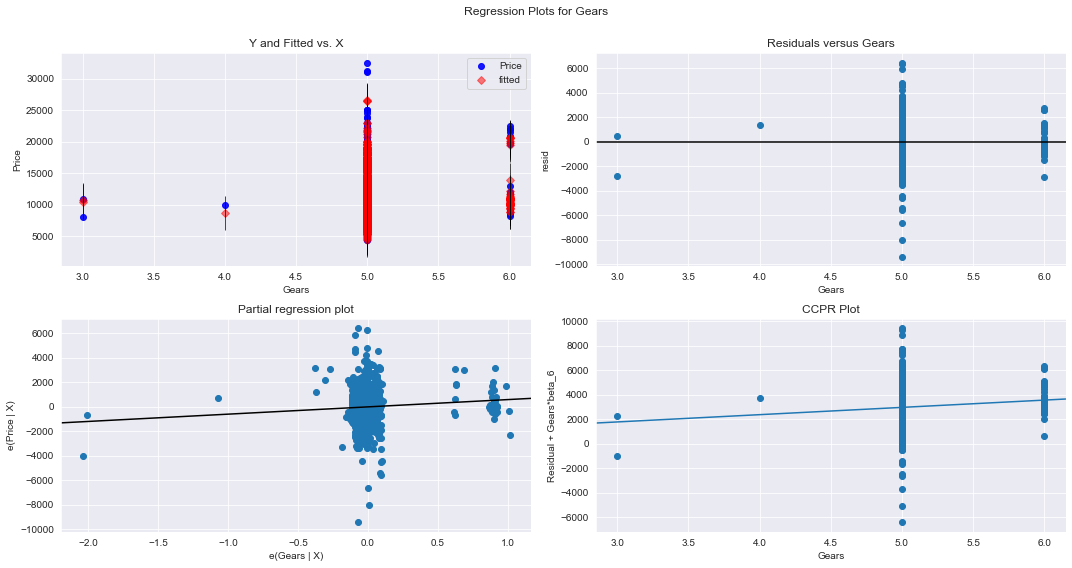

In [27]:
# Taking Gears as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig = fig)
plt.show()

eval_env: 1


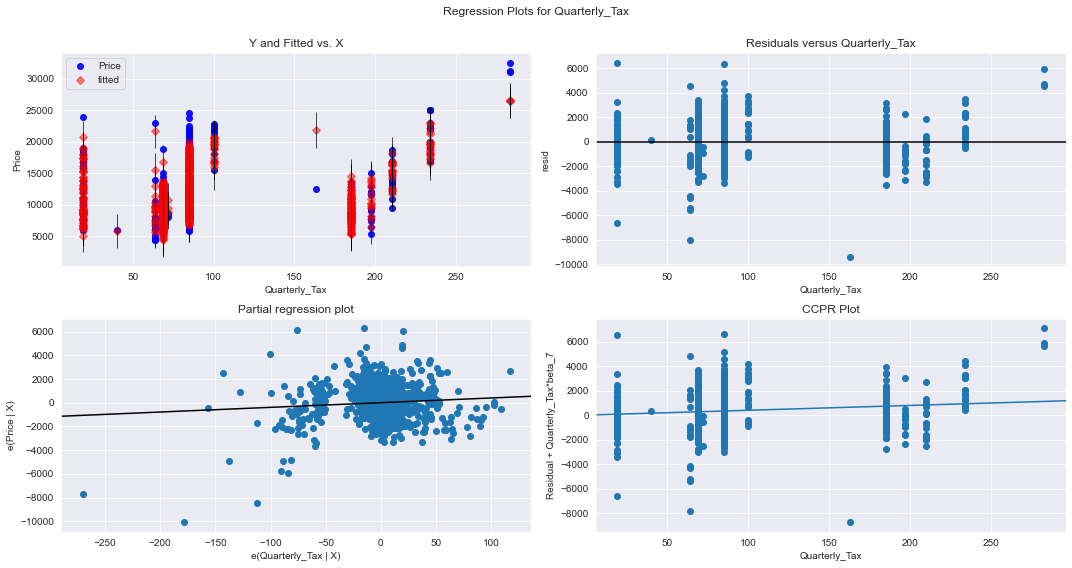

In [28]:
# Taking Quarterly_Tax as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Quarterly_Tax', fig = fig)
plt.show()

eval_env: 1


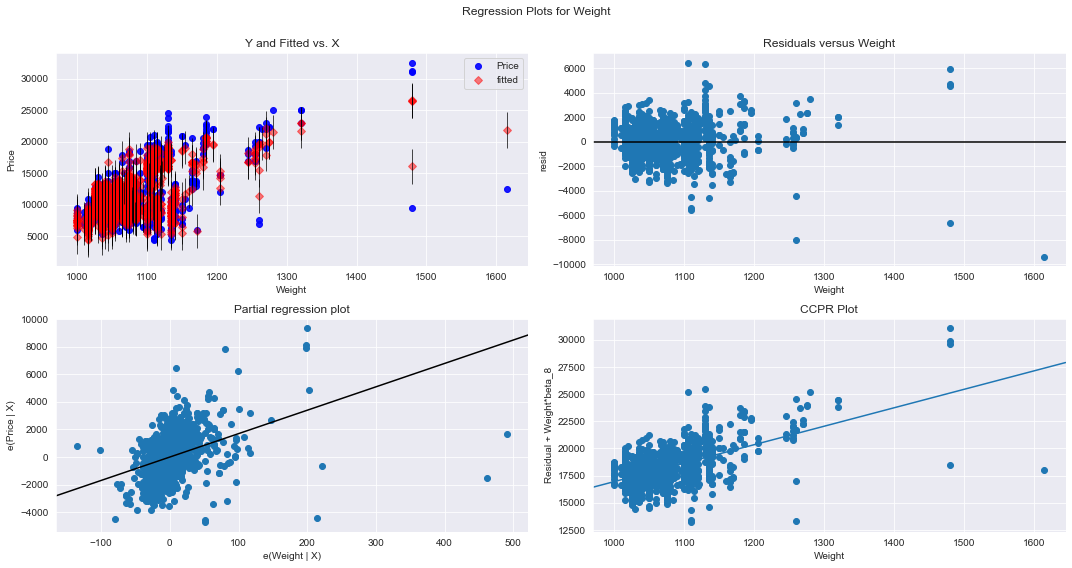

In [29]:
# Taking Weight as Regressor
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig = fig)
plt.show()

### Model Deletion Diagnostics

#### Detecting Influencers/ Outliers

#### Cook's Distance Method

In [30]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

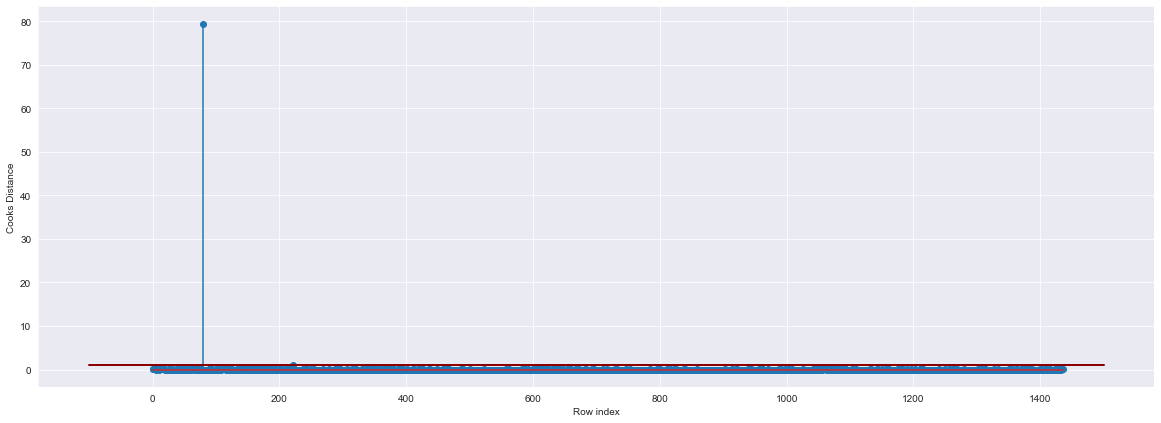

In [31]:
# Plot the influencers values using stem plot
plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(corolla)), np.round(c,3))

x = [-100,1500]
y = [1,1]
plt.plot(x, y,color='darkred', linewidth=2)

plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
# index and value of influencer where c is more than others
(np.argmax(c), np.max(c))

(80, 79.52010624138717)

### Leverage Value Method

#### High Influence Points

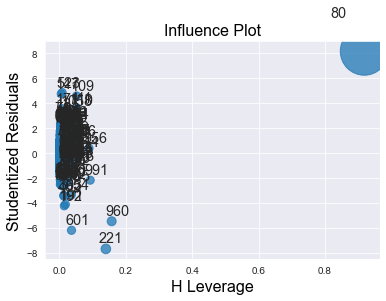

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
# to get the levarage cutoff value
k = 8      # no. of independent variables
n = corolla.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.018802228412256268

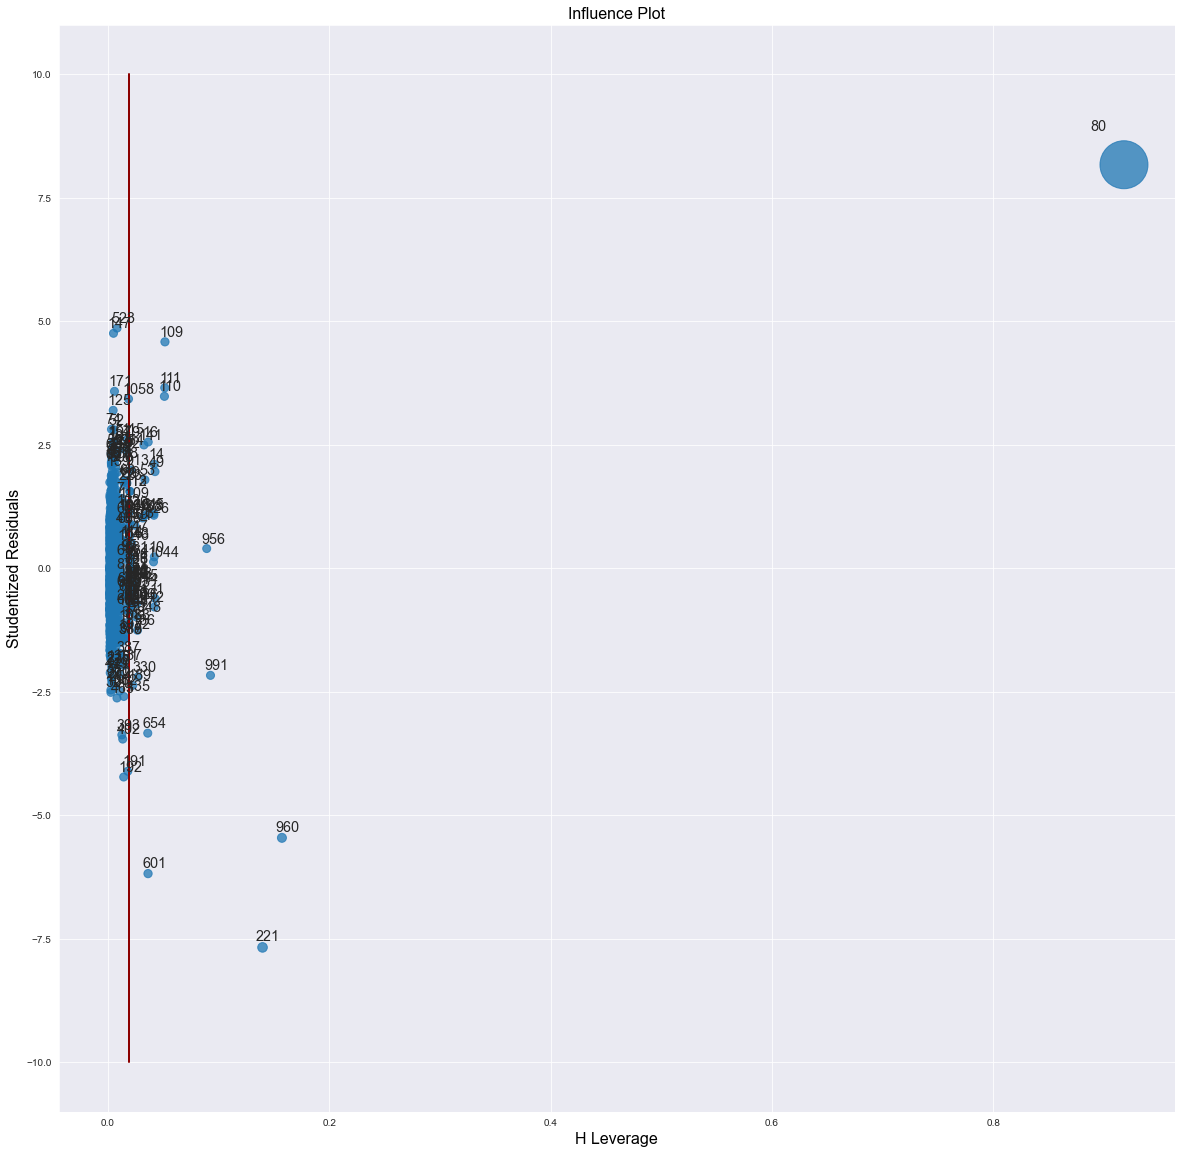

In [35]:
# to identify the outlier beyond the leverage cutoff value
fig,ax = plt.subplots(figsize=(20,20))
fig = influence_plot(model,ax=ax)
x = [leverage_cutoff,leverage_cutoff]
y = [-10,10]
plt.plot(x, y,color='darkred', linewidth=2)
plt.show()

##### From the above plot, it is evident that data points 80,960,221,991,956 are the influencers which we're going to drop from the data at present.

In [36]:
corolla[corolla.index.isin([80,960,221,991,956])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
956,10950,58,51421,110,1600,5,3,85,1105
960,9390,66,50806,86,1300,3,5,19,1480
991,7950,58,43000,110,1600,4,3,72,1114


In [37]:
# See the differences in variable values
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Improving the Model

In [38]:
# printing the original data
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [39]:
# Discard the data points which are influencers and reasign the row number (reset_index())
corolla1 = corolla.drop(corolla.index[[80,960,221,991,956]],axis=0).reset_index()

In [40]:
# Drop the original index
corolla1 = corolla1.drop(['index'],axis=1)

# printing the new data after removing outliers and index
corolla1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


### Model Deletion Diagnostics And Final Model

In [41]:
# Further process for identifying influencers and finalising the best fit model

k=8
n=corolla1.shape[0]
leverage_cutoff = (3*(k+1))/n

while np.max(c)>leverage_cutoff:
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    corolla1=corolla1.drop(corolla1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    corolla1
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla1).fit()
    final_model.rsquared , final_model.aic
    print('R-sq value: ',final_model.rsquared,
          '\nAdj R-sq value: ',final_model.rsquared_adj,
          '\nAIC: ',final_model.aic,'\nBIC: ',final_model.bic)

R-sq value:  0.8977446317819985 
Adj R-sq value:  0.8971623948099388 
AIC:  23880.979291682914 
BIC:  23928.266892301024


In [42]:
# Dimensions of the data after removing the influencers 
corolla1.shape

(1414, 9)

### Building the Model

In [43]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1542.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        22:32:06   Log-Likelihood:                -11931.
No. Observations:                1414   AIC:                         2.388e+04
Df Residuals:                    1405   BIC:                         2.393e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.519e+04   1425.274    -10.658      0.000    -1.8e+04   -1.24e+04
Age_08_04      -110.3267      2.313    -47.690      0.000    -114.865    -105.789
KM               -0.0173      0.001    -15.449      0.000      -0.019      -0.015
HP               27.4949      2.749     10.000      0.000      22.101      32.888
cc               -3.3342      0.285    -11.694      0.000      -3.894      -2.775
Doors          -139.2566     34.903     -3.990      0.000    -207.725     -70.788
Gears           219.8633    186.873      1.177      0.240    -146.716     586.443
Quarterly_Tax     1.0851      1.353      0.802      0.423      -1.570       3.740
Weight           32.7327      1.270     25.783      0.000      30.242      35.223
==============================================================================
Omnibus:                       19.270   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.383
Skew:                           0.200   Prob(JB):                     8.37e-06
Kurtosis:                       3.487   Cond. No.                     3.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model without 'cc' and 'Doors' on new data

In [44]:
m_ccdoor = smf.ols("Price ~ Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight",data=corolla1).fit()
m_ccdoor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1848.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        22:32:06   Log-Likelihood:                -12000.
No. Observations:                1414   AIC:                         2.401e+04
Df Residuals:                    1407   BIC:                         2.405e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.225e+04   1471.859     -8.324      0.000   -1.51e+04   -9364.645
Age_08_04      -114.0729      2.402    -47.486      0.000    -118.785    -109.360
KM               -0.0210      0.001    -18.734      0.000      -0.023      -0.019
HP               16.1586      2.704      5.976      0.000      10.854      21.463
Gears           448.9662    191.354      2.346      0.019      73.596     824.337
Quarterly_Tax    -4.7323      1.291     -3.667      0.000      -7.264      -2.201
Weight           25.4995      1.139     22.381      0.000      23.264      27.734
==============================================================================
Omnibus:                        9.287   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               11.043
Skew:                           0.108   Prob(JB):                      0.00400
Kurtosis:                       3.376   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Models without 'Quarterly_Tax' and 'Gears' checking individually

In [45]:
# model without 'Gears' independent variable 
m_tax = smf.ols("Price ~ Age_08_04+cc+Doors+HP+Weight+Quarterly_Tax+KM",data=corolla1).fit()
print("\nModel with 'Quarterly_Tax' variable:","\n R-square: ",m_tax.rsquared,
     "\n Adj R-sq: ",m_tax.rsquared_adj,"\n AIC: ",m_tax.aic,"\n BIC: ",m_tax.bic)
print(m_tax.summary())

# model without 'Quarterly_Tax' independent variable 
m_gears = smf.ols("Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Weight",data=corolla1).fit()
print("\nModel with 'Gears' variable:","\n R-square: ",m_gears.rsquared,
     "\n Adj R-sq: ",m_gears.rsquared_adj,"\n AIC: ",m_gears.aic,"\n BIC: ",m_gears.bic)
print(m_gears.summary())


Model with 'Quarterly_Tax' variable: 
 R-square:  0.8976438867331296 
 Adj R-sq:  0.8971342901521423 
 AIC:  23880.371720979438 
 BIC:  23922.40514375109
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1761.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        22:32:06   Log-Likelihood:                -11932.
No. Observations:                1414   AIC:                         2.388e+04
Df Residuals:                    1406   BIC:                         2.392e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|

### Model without 'Quarterly_Tax' and 'Gears' on new data

In [46]:
# model without 'Gears' and 'Quarterly_Tax' independent variable 
m_grtax = smf.ols("Price ~ Age_08_04+cc+Doors+HP+Weight+KM",data=corolla1).fit()
print("\nModel withot 'Quarterly_Tax' and 'Gears':","\n R-square: ",m_grtax.rsquared,
     "\n Adj R-sq: ",m_grtax.rsquared_adj,"\n AIC: ",m_grtax.aic,"\n BIC: ",m_grtax.bic)


Model withot 'Quarterly_Tax' and 'Gears': 
 R-square:  0.8975901216050647 
 Adj R-sq:  0.8971534057057259 
 AIC:  23879.114265112024 
 BIC:  23915.893510037222


In [47]:
m_grtax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     2055.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        22:32:06   Log-Likelihood:                -11933.
No. Observations:                1414   AIC:                         2.388e+04
Df Residuals:                    1407   BIC:                         2.392e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.461e+04   1042.292    -14.021      0.000   -1.67e+04   -1.26e+04
Age_08_04   -110.3085      2.313    -47.682      0.000    -114.847    -105.770
cc            -3.2602      0.262    -12.453      0.000      -3.774      -2.747
Doors       -150.4977     33.982     -4.429      0.000    -217.158     -83.837
HP            27.0811      2.289     11.829      0.000      22.590      31.572
Weight        33.2755      1.149     28.951      0.000      31.021      35.530
KM            -0.0171      0.001    -15.384      0.000      -0.019      -0.015
==============================================================================
Omnibus:                       18.471   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.686
Skew:                           0.189   Prob(JB):                     1.19e-05
Kurtosis:                       3.492   Cond. No.                     2.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Comparing all the prepared models

In [48]:
val = {"Model":pd.Series(["Basic_model","without_cc&Doors(before outlier removal)","without_cc&Doors(after outlier removal)",
                          "without_Gears(after outlier removal)","without_Quarterly_Tax(after outlier removal)",
                          "Finalised_model","without_Gears&Tax(after outlier removal)"]),
       "RSquare":pd.Series([model.rsquared,_m.rsquared,
                             m_ccdoor.rsquared,m_tax.rsquared,
                             m_gears.rsquared,final_model.rsquared,m_grtax.rsquared]),
       "Adj RSquare":pd.Series([model.rsquared_adj,_m.rsquared_adj,
                             m_ccdoor.rsquared_adj,m_tax.rsquared_adj,
                             m_gears.rsquared_adj,final_model.rsquared_adj,m_grtax.rsquared_adj]),
       "AIC":pd.Series([model.aic,_m.aic,m_ccdoor.aic,m_tax.aic,m_gears.aic,final_model.aic,m_grtax.aic]),
       "BIC":pd.Series([model.bic,_m.bic,m_ccdoor.bic,m_tax.bic,m_gears.bic,final_model.bic,m_grtax.bic]),
       "RMSE":pd.Series([np.sqrt(model.mse_resid),np.sqrt(_m.mse_resid),np.sqrt(m_ccdoor.mse_resid),
                         np.sqrt(m_tax.mse_resid),np.sqrt(m_gears.mse_resid),
                         np.sqrt(final_model.mse_resid),np.sqrt(m_grtax.mse_resid)])}

table = pd.DataFrame(val)
table

,Model,RSquare,Adj RSquare,AIC,BIC,RMSE
0,Basic_model,0.896603,0.896014,23928.097415,23975.391379,1133.481908
1,without_cc&Doors(before outlier removal),0.863590,0.863017,24766.894177,24803.781494,1342.381423
2,without_cc&Doors(after outlier removal),0.887415,0.886934,24013.061871,24049.841115,1175.882342
3,without_Gears(after outlier removal),0.897644,0.897134,23880.371721,23922.405144,1121.589568
4,without_Quarterly_Tax(after outlier removal),0.897698,0.897189,23879.626188,23921.659611,1121.293928
5,Finalised_model,0.897745,0.897162,23880.979292,23928.266892,1121.436339
6,without_Gears&Tax(after outlier removal),0.897590,0.897153,23879.114265,23915.893510,1121.485351


## Final Model

The Equation is 

Price = B0 + B1(Age_08_04) + B2(KM) + B3(HP) + B4(cc) + B5(Doors) + B6(Gears) + B7(Weight) + e


In [49]:
# renaming the best model
Best_model = m_gears
Best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1763.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        22:32:06   Log-Likelihood:                -11932.
No. Observations:                1414   AIC:                         2.388e+04
Df Residuals:                    1406   BIC:                         2.392e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.561e+04   1325.439    -11.778      0.000   -1.82e+04    -1.3e+04
Age_08_04   -110.3329      2.313    -47.699      0.000    -114.870    -105.795
KM            -0.0172      0.001    -15.435      0.000      -0.019      -0.015
HP            26.3680      2.363     11.159      0.000      21.733      31.003
cc            -3.2442      0.262    -12.379      0.000      -3.758      -2.730
Doors       -141.3113     34.805     -4.060      0.000    -209.586     -73.037
Gears        227.0812    186.632      1.217      0.224    -139.026     593.188
Weight        33.1581      1.153     28.752      0.000      30.896      35.420
==============================================================================
Omnibus:                       19.023   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.316
Skew:                           0.194   Prob(JB):                     8.65e-06
Kurtosis:                       3.495   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# RMSE of the best model
np.sqrt(Best_model.mse_resid)

1121.2939276711443

## Prediction

The following is the data with actual and predicted values of the dependent variable(Price)

In [51]:
corolla['Predicted Price'] = Best_model.predict(corolla)
corolla[['Price','Predicted Price']]

,Price,Predicted Price
0,13500,16269.409682
1,13750,15823.405116
2,13950,16249.735109
3,14950,15920.983978
4,13750,15808.713902
...,...,...
1431,7500,9171.902777
1432,10845,8535.858733
1433,8500,8680.289468
1434,7250,8792.341004


## Prediction for New Data

In [52]:
new_data = pd.DataFrame({'Age_08_04':23,'HP':90,
                         'KM':20210,'cc':5000,
                         'Doors':4,'Gears':6,
                         'Quarterly_Tax':1010,'Weight':1991},index=[1])
new_data

,Age_08_04,HP,KM,cc,Doors,Gears,Quarterly_Tax,Weight
1,23,90,20210,5000,4,6,1010,1991


In [53]:
# predicted profit for the new data
Best_model.predict(new_data)

1    34471.232047
dtype: float64